In [39]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.optimize import minimize, least_squares

# Load test samples
from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")

from aeons.covariance import logX_mu, logX_covinv_chol, points_at_iteration, X_mu, X_Sigma, X_Sigmainv, data_at_iteration
from aeons.true_distribution import generate_Xs
from aeons.lm_partial import analytic_lm_params
from bayes import logPr_bayes, logPr_gaussian, minimise_ls, minimise_bayes, minimise_gaussian
from likelihoods import linear_like, quad_like, log_like, simple_like, middle_like
linear, quad, log = linear_like(), quad_like(), log_like()

simple, middle = simple_like(), middle_like()

In [2]:
def plot_bayes_ls(nk, theta_true, likelihood, mean_X, covinv_X):
    Xs = generate_Xs(nk)
    y = likelihood.func(Xs, theta_true)

    theta_bayes = minimise_bayes(y, likelihood, mean_X, covinv_X, theta_true).x
    theta_ls = minimise_ls(y, likelihood, mean_X, theta_true).x

    plt.plot(Xs, y, 'x', ms=2)
    plt.plot(Xs, likelihood.func(Xs, theta_bayes), label='bayes')
    plt.plot(Xs, likelihood.func(Xs, theta_ls), label='ls')
    plt.legend();
    print(f'bayes: {theta_bayes}')
    print(f'ls: {theta_ls}')
    return Xs, theta_bayes, theta_ls

**Errorbars on $X$ datapoints**

Start with $\{\log L_i\}$. Get $\theta$, then plot $X_i = f^{-1}(\log L_i, \theta)$ $\{\log L_i\}$ against 

Plot $E(X)$ - error bars given by square root of diagonal of $\mathrm{Cov(X_i, X_j)}$

Plot in space normalised by Cholesky decomposition

In [50]:
nk = 500 * np.ones(100)
mean_X = X_mu(nk)
covinv_X = X_Sigmainv(nk)
cov_X = X_Sigma(nk)

In [51]:
X = generate_Xs(nk)
X_std = np.sqrt(np.diagonal(cov_X))
Xplus, Xminus = X + X_std, X - X_std
y = simple.func(X, 10)

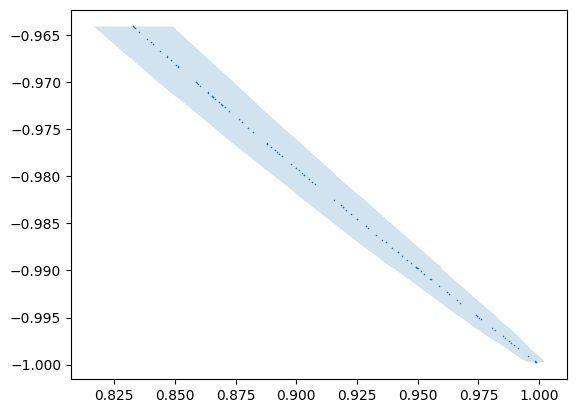

In [52]:
plt.fill_betweenx(y, Xplus, Xminus, alpha=0.2);
plt.plot(X, y, 'x', ms=.5);